# 🔭 Análise de Exoplanetas com Dados Reais da NASA Exoplanet Archive

Este notebook realiza uma **consulta automatizada à API do NASA Exoplanet Archive** (IPAC/Caltech) para obter **dados reais de exoplanetas candidatos**, especificamente aqueles com:

- **Período orbital (`koi_period`) > 300 dias**
- **Raio do planeta (`koi_prad`) < 2**
- **Classificação como 'CANDIDATE'**

### 📌 Objetivo

O objetivo é:

- Coletar dados diretamente da base científica da NASA usando a API oficial
- Carregá-los com `pandas` em tempo real
- Realizar análises estatísticas e visuais sobre os exoplanetas selecionados
- Explorar variáveis como período orbital, raio e temperatura efetiva

### 🧰 Como vamos fazer isso?

1. Usar a biblioteca `requests` para montar e enviar a consulta HTTP à API
2. Carregar o CSV retornado diretamente na memória com `pandas`
3. Visualizar os dados e gerar gráficos com `matplotlib` e `seaborn`
4. (Opcional) Aplicar métodos de aprendizado de máquina ou clustering

> Este é um exemplo real de como integrar **astrofísica + ciência de dados + Python**, utilizando dados públicos de qualidade científica.

---


In [ ]:
import pandas as pd
import requests

# URL base da API
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"

# Parâmetros de busca
params = {
    "table": "cumulative",
    "where": "koi_disposition like 'CANDIDATE' and koi_period>300 and koi_prad<2",
    "order": "koi_period",
    "format": "csv"
}

# Construir URL com requests
response = requests.get(base_url, params=params)

# Verificar se a requisição foi bem sucedida
if response.status_code == 200:
    from io import StringIO
    df = pd.read_csv(StringIO(response.text))
    print(df.head())
else:
    print("Erro ao acessar API:", response.status_code)


      kepid kepoi_name  kepler_name koi_disposition koi_pdisposition  \
0  11294822  K08047.01          NaN       CANDIDATE        CANDIDATE   
1  11722217  K05930.01          NaN       CANDIDATE        CANDIDATE   
2   4940203  K07711.01          NaN       CANDIDATE        CANDIDATE   
3   4572728  K08249.01          NaN       CANDIDATE        CANDIDATE   
4  10552263  K05806.01          NaN       CANDIDATE        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      0.513              0              0              0              0  ...   
1        NaN              0              0              0              0  ...   
2      0.987              0              0              0              0  ...   
3      0.363              0              0              0              0  ...   
4        NaN              0              0              0              0  ...   

   koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  koi_srad_err1  \
0      

Agora, aqui está a segunda célula do notebook com o código Python completo para download e leitura dos dados:


In [ ]:
# 📥 Consulta à API da NASA Exoplanet Archive (candidatos com período > 300d e raio < 2R_terra)

import pandas as pd
import requests
from io import StringIO

# URL base da API
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"

# Parâmetros para filtrar candidatos com período orbital > 300 dias e raio < 2
params = {
    "table": "cumulative",
    "where": "koi_disposition like 'CANDIDATE' and koi_period>300 and koi_prad<2",
    "order": "koi_period",
    "format": "csv"
}

# Requisição para a API
response = requests.get(base_url, params=params)

# Verificação da resposta e leitura com pandas
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
    print(f"✅ Dados carregados com sucesso! {df.shape[0]} exoplanetas, {df.shape[1]} colunas.")
    display(df.head())  # para Google Colab
else:
    print("❌ Erro ao acessar a API:", response.status_code)


✅ Dados carregados com sucesso! 78 exoplanetas, 50 colunas.


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,11294822,K08047.01,NaN,CANDIDATE,CANDIDATE,0.513,0,0,0,0,...,4.564,0.032,-0.048,0.794,0.046,-0.051,19h22m47.09s,+49d03m57.9s,15.222,NaN
1,11722217,K05930.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,4.944,0.060,-0.140,0.303,0.100,-0.050,19h45m00.60s,+49d53m11.6s,15.755,NaN
2,4940203,K07711.01,NaN,CANDIDATE,CANDIDATE,0.987,0,0,0,0,...,4.572,0.042,-0.168,0.797,0.207,-0.069,19h43m56.17s,+40d02m37.0s,14.160,NaN
3,4572728,K08249.01,NaN,CANDIDATE,CANDIDATE,0.363,0,0,0,0,...,3.990,0.253,-0.117,1.754,0.358,-0.537,19h38m33.04s,+39d39m20.9s,12.746,NaN
4,10552263,K05806.01,NaN,CANDIDATE,CANDIDATE,NaN,0,0,0,0,...,4.453,0.063,-0.274,0.973,0.378,-0.103,19h51m28.81s,+47d46m15.9s,12.355,NaN


## 📊 Análise Exploratória Inicial dos Exoplanetas Candidatos

Agora que carregamos os dados, vamos iniciar a **análise exploratória (EDA)** com gráficos simples. Isso nos permitirá:

- Visualizar a distribuição dos períodos orbitais dos exoplanetas
- Observar o raio planetário (`koi_prad`)
- Avaliar o escore de confiabilidade da detecção (`koi_score`)

Essas visualizações ajudam a entender o perfil geral dos exoplanetas candidatos de longo período e baixo raio.


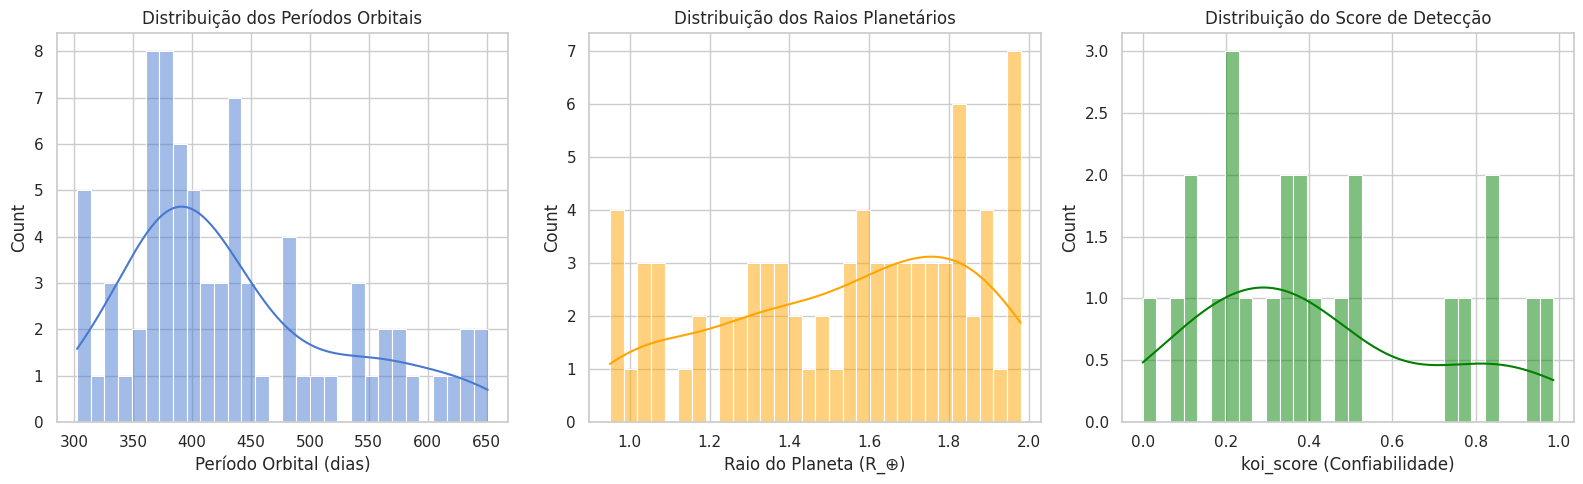

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 5))

# Histograma do período orbital
plt.subplot(1, 3, 1)
sns.histplot(df['koi_period'], bins=30, kde=True)
plt.xlabel("Período Orbital (dias)")
plt.title("Distribuição dos Períodos Orbitais")

# Histograma do raio do planeta
plt.subplot(1, 3, 2)
sns.histplot(df['koi_prad'], bins=30, kde=True, color="orange")
plt.xlabel("Raio do Planeta (R_⊕)")
plt.title("Distribuição dos Raios Planetários")

# Histograma do score de confiabilidade
plt.subplot(1, 3, 3)
sns.histplot(df['koi_score'], bins=30, kde=True, color="green")
plt.xlabel("koi_score (Confiabilidade)")
plt.title("Distribuição do Score de Detecção")

plt.tight_layout()
plt.show()


## 🔗 Análise de Correlação entre Variáveis Físicas

Nesta célula, vamos investigar **relações entre variáveis astrofísicas dos exoplanetas candidatos**, por meio de:

- Matriz de correlação (coeficiente de Pearson)
- Mapa de calor (`heatmap`) para destacar as variáveis mais relacionadas
- Gráficos de dispersão (scatter plots) entre variáveis-chave

Isso pode ajudar a identificar tendências úteis para futuras análises com aprendizado de máquina ou classificação automática de planetas.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


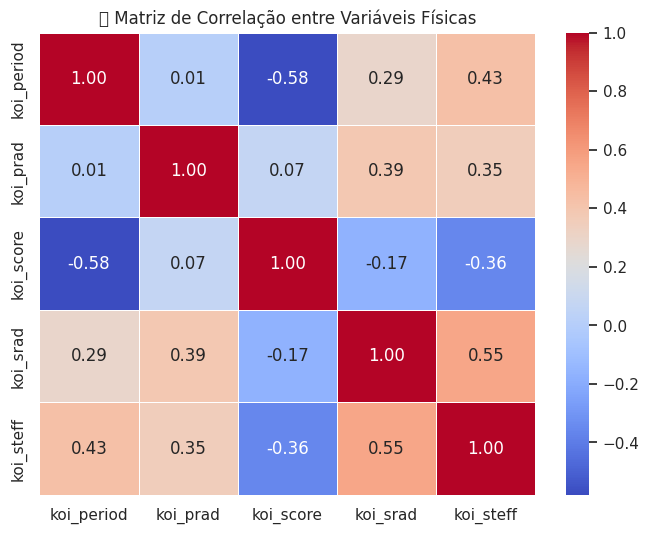

In [ ]:
# Subconjunto das variáveis contínuas de interesse
variaveis = ['koi_period', 'koi_prad', 'koi_score', 'koi_srad', 'koi_steff']

# Remover linhas com dados ausentes nessas colunas
df_corr = df[variaveis].dropna()

# Calcular matriz de correlação
correlation_matrix = df_corr.corr()

# Exibir matriz como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlação entre Variáveis Físicas")
plt.show()


## 🧠 Clusterização de Exoplanetas com KMeans

Nesta etapa, vamos aplicar o algoritmo **KMeans** para agrupar os exoplanetas candidatos com base em variáveis contínuas:

- `koi_period` (período orbital)
- `koi_prad` (raio planetário)
- `koi_srad` (raio da estrela)
- `koi_steff` (temperatura efetiva da estrela)

O objetivo é **identificar padrões e perfis típicos de sistemas planetários**.

### Etapas:
1. Selecionar as variáveis relevantes e normalizá-las
2. Aplicar o algoritmo KMeans com 3 clusters
3. Visualizar os grupos formados

Essa abordagem pode revelar agrupamentos naturais de planetas semelhantes — por exemplo, superterras frias, mini-netunos etc.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129680 (\N{RINGED PLANET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


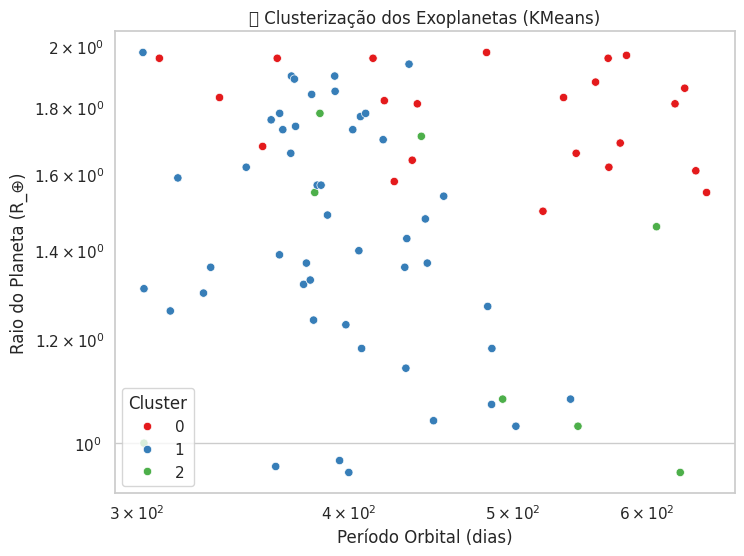

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecionar colunas para clustering
features = ['koi_period', 'koi_prad', 'koi_srad', 'koi_steff']
df_cluster = df[features].dropna()

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Visualização dos clusters (usando período e raio planetário)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='koi_period', y='koi_prad', hue='cluster', palette='Set1')
plt.title("🪐 Clusterização dos Exoplanetas (KMeans)")
plt.xlabel("Período Orbital (dias)")
plt.ylabel("Raio do Planeta (R_⊕)")
plt.legend(title="Cluster")
plt.xscale("log")  # Para melhor visualização da escala dos períodos
plt.yscale("log")
plt.grid(True)
plt.show()


## 🤖 Modelagem Supervisionada: Classificação de Exoplanetas

Agora que agrupamos os exoplanetas com KMeans, vamos usar esses clusters como **rótulos supervisionados** e treinar dois modelos distintos:

1. **Árvore de Decisão** (modelo explicável e rápido)
2. **Rede Neural Multicamadas (MLP)** para maior capacidade de modelagem

Ambos os modelos receberão como entrada as variáveis físicas:

- `koi_period`, `koi_prad`, `koi_srad`, `koi_steff`

E tentarão prever a qual **cluster** (perfil planetário) o exoplaneta pertence.

> Essa técnica pode ser aplicada a dados observacionais futuros para classificar novos exoplanetas em tempo real.


## 🌳 Classificação de Exoplanetas com Árvore de Decisão

Nesta célula, aplicamos um modelo de **Árvore de Decisão** para classificar exoplanetas com base em seus parâmetros físicos:

- Período orbital (`koi_period`)
- Raio planetário (`koi_prad`)
- Raio estelar (`koi_srad`)
- Temperatura efetiva da estrela (`koi_steff`)

O modelo será treinado usando os clusters definidos anteriormente como rótulos. As Árvores de Decisão são úteis por serem **explicáveis**, permitindo interpretar a lógica por trás de cada decisão.

Vamos treinar, testar e exibir a acurácia do modelo, a matriz de confusão e o relatório de classificação.


📈 Matriz de Confusão:
[[3 1 0]
 [1 8 1]
 [1 1 0]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.80      0.80        10
           2       0.00      0.00      0.00         2

    accuracy                           0.69        16
   macro avg       0.47      0.52      0.49        16
weighted avg       0.65      0.69      0.67        16



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


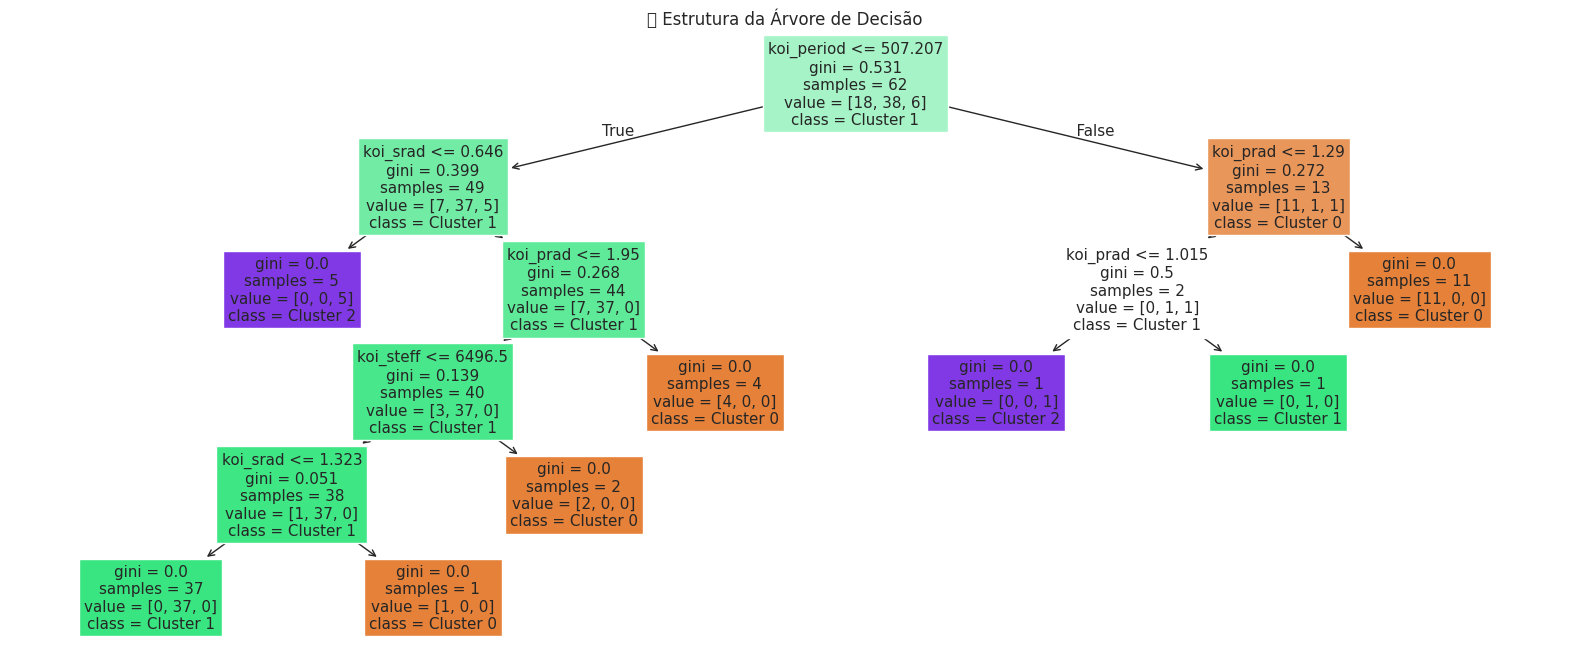

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Seleção de features e rótulo
X = df_cluster[features].values
y = df_cluster['cluster'].values

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Previsões
y_pred_tree = dtree.predict(X_test)

# Avaliação
print("📈 Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_tree))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred_tree))

# Visualização da árvore
plt.figure(figsize=(20, 8))
plot_tree(dtree, feature_names=features, class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title("🌳 Estrutura da Árvore de Decisão")
plt.show()


## 🧠 Classificação de Exoplanetas com Rede Neural Multicamadas (MLP)

Nesta célula, construiremos um modelo de **rede neural densa (MLP)** com Keras para prever o cluster de um exoplaneta a partir de suas variáveis físicas.

### Características usadas como entrada:
- `koi_period` (período orbital)
- `koi_prad` (raio do planeta)
- `koi_srad` (raio da estrela hospedeira)
- `koi_steff` (temperatura efetiva da estrela)

### Etapas:
1. Normalizar os dados
2. One-hot encoding dos rótulos
3. Treinar o modelo MLP com camadas ocultas, ReLU e Dropout
4. Avaliar desempenho e visualizar curva de acurácia

O modelo poderá ser usado futuramente para classificar automaticamente novos exoplanetas com base em dados físicos observacionais.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Acurácia da nova rede neural: 0.9375


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


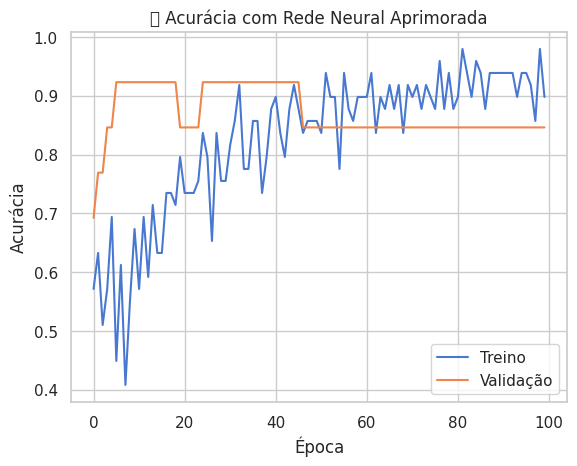

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Construção do modelo com melhorias
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para parada antecipada
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# Treinamento com validação
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

# Avaliação
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"✅ Acurácia da nova rede neural: {acc:.4f}")

# Gráfico atualizado
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("📈 Acurácia com Rede Neural Aprimorada")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()
